In [ ]:
!pip install praw
!pip install siuba
!pip install plotnine
!pip install wordcloud
import praw
import pandas as pd
import datetime
import re
import nltk
from siuba import *
from nltk.corpus import stopwords
nltk.download('stopwords')
import seaborn as sns

reddit = praw.Reddit(client_id='sIXZTihLNiKiHw',
                     client_secret='EjfAsmz5z8mDbZohe4UPYTPIZsYmOQ',
                     user_agent='Test1', check_for_async=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#1. Posts related to crypto/bitcoin among the last 10000 hot ones on Reddit

reddit_all = reddit.subreddit('all').hot(limit=10000)
for post in reddit_all:
    if (post.title.lower().find('crypto') != -1 or post.title.lower().find('bitcoin') != -1):
        print(post.title, datetime.datetime.fromtimestamp(post.created))

In [ ]:
#2. Sentiment analysis in CryptoCurrency community

from matplotlib import pyplot as plt
!pip install NRCLex
from nrclex import NRCLex

import nltk
nltk.download('punkt')

posts = []
crypto_subreddit = reddit.subreddit('CryptoCurrency')
for post in crypto_subreddit.hot(limit=1000):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
posts

full_text = ""
for text in posts['body']:
  full_text+=text

# from plotnine import *

# We meet the "piping" format of writing code for the first time, ggplot likes to use this format for ease of writing
# (ggplot(posts)         # defining what data to use
#  + aes(x='title', y='chapter_score')    # defining what variables to use
#  + geom_bar(stat='identity') # defining the type of plot to use
# )

# text_object = NRCLex(full_text)

# text_object.top_emotions

# text_object.raw_emotion_scores

!pip install -q transformers
# Get our sentiment analysis model from pipeline
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
!pip install wordcloud
wordcloud = WordCloud(background_color='white', width=1000, height=800).generate(full_text)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
!pip install wordcloud
wordcloud = WordCloud(background_color='white', width=1000, height=800).generate(full_text)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


data = []
for title in posts['title']:
  if title.lower().find('bitcoin')!=-1:
    print(title)
    data.append(title)


import matplotlib.pyplot as plt
import numpy as np

sum = sentiment_pipeline(data)
count = 0
for i in sum:
  if i['label'] == 'NEGATIVE':
    count+=1
print("Out of the latest " + str(len(sum))  + " reddit posts on r/CryptoCurrency regarding BitCoin " + str(count) + " are negative")

vals = []
vals.append(count)
vals.append(len(data)-count)
y = np.array(vals)
mylabels = ['Negative', 'Positive']

plt.pie(y, labels = mylabels)
plt.show()

           word  n  term_frequency
0       suicide  5        0.000867
1      remember  5        0.000867
2     investors  4        0.000693
3         still  4        0.000693
4           new  4        0.000693
..          ... ..             ...
482        fast  1        0.000173
483        fair  1        0.000173
484   factslost  1        0.000173
485  explaining  1        0.000173
486    🤣🤣🤣🤣🤣i’m  1        0.000173

[487 rows x 3 columns]


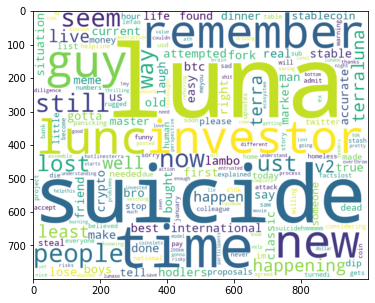

In [ ]:
#3 Terra Luna suicide statistics in the last year. (Term Frequency)
from siuba import *
from matplotlib import pyplot as plt
common_topic_words = ['', '-', 'luna', 'ust', 'terra', 'really', 'kwon', 'burn', 'coin']

reddit_terraluna = reddit.subreddit("terraluna").top(time_filter="year", limit=100)
string = ""
for post in reddit_terraluna:
  string = string + post.title.lower()

array = re.split('\s|(?<!\d)[,.](?!\d)', string)
ss_df = pd.DataFrame(data={ 'word': array })
ss_df_cleaned = ss_df[~ss_df['word'].isin(stopwords.words('english') + common_topic_words)]
total_words = ss_df_cleaned.dropna()
total_words = count(total_words, _.word, sort=True)
total_words['term_frequency'] = total_words['n'] / len(string)
print(total_words)

cloud_string = ""
for string in array:
  if(string not in common_topic_words):
    cloud_string = cloud_string + string + ' '

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color='white', width=1000, height=800).generate(cloud_string)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


             bigrams   n
0     (thank, share)  25
1      (lose, money)  17
2     (stay, strong)   8
3     (share, story)   6
4       (https, www)   6
...              ...  ..
4896     (go, pills)   1
4897       (go, pay)   1
4898       (go, one)   1
4899        (go, ok)   1
4900  (zombie, like)   1

[4901 rows x 2 columns]
50
9
30
600
2
125


<BarContainer object of 4 artists>

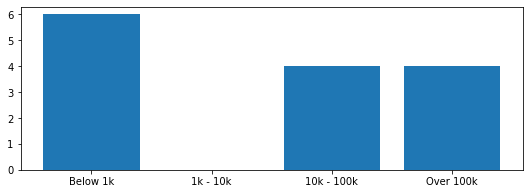

In [ ]:
#4 Lost over x money ( Lemmentization + N grams )

from nltk.stem import WordNetLemmatizer
import numpy as np
from matplotlib import pyplot as plt
nltk.download('wordnet')
nltk.download('omw-1.4')
en_stop = set(nltk.corpus.stopwords.words('english'))

# We are going to create a function for text preprocessing since we are going to be analyzing multiple texts and will want to reuse the code.
stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word, pos='v') for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]

        return tokens

submission = reddit.submission(url = 'https://www.reddit.com/r/terraluna/comments/un0fni/for_those_considering_suicide_heres_my_story_of/')
# submission.comments.replace_more(limit=1000)
comments_list = submission.comments.list()
comments_bigrams = []
comments_string = []
for comment in comments_list:
    if(isinstance(comment, praw.models.reddit.comment.Comment)):
      comments_string = np.concatenate((comments_string, preprocess_text(comment.body)))

for word1, word2 in zip(comments_string, comments_string[1:]):
    comments_bigrams.append( (word1 ,word2) )

comment_bigrams_df = pd.DataFrame({
    "bigrams": comments_bigrams,
})
comment_bigrams_count = count(comment_bigrams_df, _.bigrams, sort=True)
print(comment_bigrams_count)

# plt.figure(figsize=(5,4))
# sns.countplot(y="bigrams",
#              data = comment_bigrams_df,
#              order = comment_bigrams_df["bigrams"].value_counts().iloc[:10].index)
# plt.show()

threshold = [0, 0, 0, 0]
names = ['Below 1k', '1k - 10k', '10k - 100k', 'Over 100k']

numbers = []
for row in comment_bigrams_df.bigrams:

  if(row[0] == 'lose'):
    old_row = row[1]
    number = re.findall(r'\d+', row[1])
    if(number):
      if(row[1][-1] == 'k'):
        number = int(number[0]) * 1000
        if(number >= 100000):
            threshold[3] += 1
        elif(number >= 10000 and number <= 100000):
            threshold[2] += 1
        else: threshold[1] += 1
      else:
        number = int(number[0])
        if(number >= 100000):
            threshold[3] += 1
        elif(number >= 10000 and number <= 100000):
            threshold[2] += 1
        elif(number >= 1000 and number <= 10000):
            threshold[1] += 1
        else:
            threshold[0] += 1

      numbers.append(number)

plt.figure(figsize=(9, 3))
plt.bar(names, threshold)


In [ ]:
#5 Entity Recognition -

!pip install wikipedia
!pip install --upgrade pip
!pip install textacy
!python -m spacy download en_core_web_lg


nlp = spacy.load('en_core_web_sm')
import spacy
nlp = spacy.load('en_core_web_lg')


def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

posts = []
crypto_subreddit = reddit.subreddit('Dogecoin')
for post in crypto_subreddit.top(limit=10000):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
data = []
for title in posts['title']:
  data.append(title)
for body in posts['body']:
  data.append(body)


full_data = ' '.join([str(item) for item in data])
full_data
doc = nlp(full_data)
spacy.displacy.render(doc, style='ent', jupyter=True)


import random
from collections import Counter #for counting
import seaborn as sns #for visualization
import matplotlib.pyplot as plt
import pandas as pd
import json
from IPython.display import Markdown, display
plt.style.use('seaborn')
sns.set(font_scale=2)

def pretty_print(pp_object):
    print(json.dumps(pp_object, indent=2))


def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))


doc = nlp(full_data)
doc


# Let's get rid of stop words
crypto_topics = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        crypto_topics.append(token)

crypto_topics = [str(x) for x in crypto_topics]

df_nouns = pd.DataFrame(crypto_topics, columns=["Crypto Topics"])
df_nouns
plt.figure(figsize=(5,4))
sns.countplot(y="Crypto Topics",
             data=df_nouns,
             order=df_nouns["Crypto Topics"].value_counts().iloc[:10].index)
plt.show()


crypto_topics = []
for ent in doc.ents:
    if ent.label_ in ["PERSON"]:
#         print(ent.text,ent.label_)
        crypto_topics.append(ent.text.strip())
df_nouns = pd.DataFrame(crypto_topics, columns=["Crypto Topics"])
df_nouns
plt.figure(figsize=(5,4))
sns.countplot(y="Crypto Topics",
             data=df_nouns,
             order=df_nouns["Crypto Topics"].value_counts().iloc[:10].index)
plt.show()


posts = []
crypto_subreddit = reddit.subreddit('CryptoCurrency')
for post in crypto_subreddit.top(limit=500):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
data = []
for title in posts['title']:
  data.append(title)
for body in posts['body']:
  data.append(body)
full_data = ' '
full_data = ' '.join([str(item) for item in data])
full_data
doc = nlp(full_data)
spacy.displacy.render(doc, style='ent', jupyter=True)



# Let's get rid of stop words
crypto_topics = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2) and (str(token).endswith('coin')):
        crypto_topics.append(token)

crypto_topics = [str(x) for x in crypto_topics]

df_nouns = pd.DataFrame(crypto_topics, columns=["Crypto Topics"])
df_nouns
plt.figure(figsize=(5,4))
sns.countplot(y="Crypto Topics",
             data=df_nouns,
             order=df_nouns["Crypto Topics"].value_counts().iloc[:10].index)
plt.show()